# Task 2: Model Baseline and Data preparation

**Course:** Introduction to Data Science
**Lecturer:** Prof. Dr. Hendrik Meth

**Group 2:**
- Linus Breitenberger
- Tristan Ruhm
- Prarichut Poachanuan
- Anushka Irphale
- Patryk Gadziosmki

<div style="width:100%;height:30px;background-color:#E31134"></div>

## 0. Importing Requirements

In [470]:
# importing libraries
import pandas as pd
from sklearn import linear_model
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn import preprocessing
from sklearn.preprocessing import PowerTransformer

## 1. Baseline linear regression model

In [471]:
# Loading the train and test data
train_df = pd.read_csv('../data/BikeRentalDaily_train.csv', delimiter=';')
test_df = pd.read_csv('../data/BikeRentalDaily_test.csv', delimiter=';')

### 1.1. Minimal Preprocessing

In [472]:
# Replacing all MissingValues with the most frequent values (don't make any sense, just for the working code)
imp_most_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

train_df[:] = imp_most_freq.fit_transform(train_df)
test_df[:] = imp_most_freq.fit_transform(test_df)

In [473]:
# 'dteday' is not neccessary

train_df = train_df.drop('dteday', axis=1)
test_df = test_df.drop('dteday', axis=1)

### 1.2. Features/Label - Train/Test Split

In [474]:
# Splitting the train data into features and labels
train_features = train_df.iloc[:, :13]
train_labels = train_df.iloc[:, -1:]

# Splitting the test data into features and labels
test_features = test_df.iloc[:, :13]
test_labels = test_df.iloc[:, -1:]

In [475]:
# Check the split

train_features
# train_labels

# test_features
# test_labels

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets
0,154,2.0,0,6,0,5,1,1,24.8000,0.587133,53.12505,0.253121,991
1,685,4.0,1,11,0,4,1,2,12.8667,0.324492,93.06255,0.152987,601
2,368,1.0,1,1,0,2,1,1,6.0000,0.126275,66.18750,0.365671,549
3,472,2.0,1,4,1,1,0,1,26.5667,0.614925,84.25005,0.284829,740
4,442,1.0,1,3,0,-1,0,2,20.5667,0.505046,113.37495,0.110704,773
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,78,1.0,0,3,0,6,0,1,18.9000,0.466525,56.87505,0.368167,1022
596,81,1.0,0,3,0,2,1,1,17.6667,0.440642,93.68745,0.225750,551
597,377,1.0,1,1,0,4,1,2,15.3000,0.381938,120.43755,0.180967,520
598,299,4.0,0,10,0,3,1,2,19.3667,0.472846,108.06255,0.148642,605


### 1.3. Linear Regresion

In [476]:
# Model building

# We use linear regression, which is a supervised learning technique 
# with usage of labeled training data.
baseline_model = linear_model.LinearRegression()

baseline_model.fit(train_features, train_labels)

print(baseline_model.coef_)

[[ 1.24294882e+00  3.15719720e+02  1.99436579e+03 -3.54038301e+00
  -1.04678985e+03  1.82091578e+02 -4.71749309e+02 -7.48293456e+02
  -1.55008874e+01  7.94676335e+03 -7.04580755e+00 -6.30206852e+02
   9.13325512e-01]]


In [477]:
# Predict all test examples
ypred = baseline_model.predict(test_features)
ypred

array([[3406.9932736 ],
       [5089.67118593],
       [6893.58964078],
       [2381.29972783],
       [3495.756797  ],
       [ 696.39473747],
       [7629.06916376],
       [5843.83408871],
       [6781.57592485],
       [5900.84318077],
       [5367.8802674 ],
       [7521.66103429],
       [3392.46884844],
       [8149.93997078],
       [6684.35830847],
       [7905.54699563],
       [7412.91704975],
       [2419.05241288],
       [5465.43898259],
       [7696.61069886],
       [7510.5236049 ],
       [4989.11532123],
       [4176.96843099],
       [1240.87449579],
       [6273.7230086 ],
       [5420.55149342],
       [5942.6946315 ],
       [4730.3594732 ],
       [7547.89727355],
       [5307.62372381],
       [6138.19940021],
       [7362.78098889],
       [7256.54392756],
       [5573.02496653],
       [1283.71452962],
       [5776.50021622],
       [2670.1314791 ],
       [1354.34383982],
       [2787.95457997],
       [5331.39070204],
       [5319.01750342],
       [1312.922

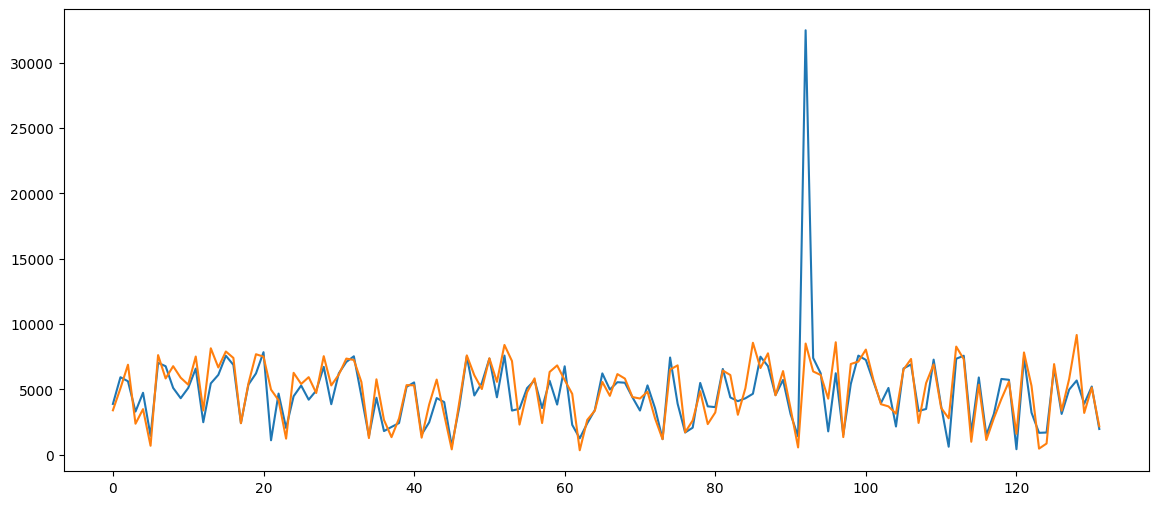

In [478]:
# Visualize the output
plt.figure(figsize=(14,6))
plt.plot(test_labels)
plt.plot(ypred)

In [479]:
print(f"Predict label for following example:\n{test_features.iloc[0,:]}")

#Predict a single value
predicted_value = baseline_model.predict([test_features.iloc[0,:]])[0]

print("\nPredicted label: ",predicted_value)
print("Actual label:", test_labels.iloc[0])
print("Deviation predicted from actual value: ",predicted_value - test_labels.iloc[0])

Predict label for following example:
instant       299.000000
season          4.000000
yr              0.000000
mnth           10.000000
holiday         0.000000
weekday         3.000000
workingday      1.000000
weathersit      2.000000
temp           19.366700
atemp           0.472846
hum           108.062550
windspeed       0.148642
leaflets      605.000000
Name: 0, dtype: float64

Predicted label:  [3406.9932736]
Actual label: cnt    3894
Name: 0, dtype: int64
Deviation predicted from actual value:  cnt   -487.006726
Name: 0, dtype: float64


c:\Users\Akira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### 1.4. Evaluate Baseline model

In [480]:
# Evaluate model

#Return Mean Absolute Error -> Loss: The beste Value is 0.0
mae = mean_absolute_error(test_labels, ypred)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction -> Score: best possible value is 1.0
print("R^2 value of the model: ",baseline_model.score(test_features, test_labels))

MAE: 1054.862
R^2 value of the model:  0.4001965370904248


## 2. Preprocessing

In [481]:
# Loading the train and test data
train_df = pd.read_csv('../data/BikeRentalDaily_train.csv', delimiter=';')
test_df = pd.read_csv('../data/BikeRentalDaily_test.csv', delimiter=';')

### 2.1. Train Data Preprocessing

In [482]:
sorted_df = train_df.sort_values(by=['instant'])
train_df = sorted_df.set_index('instant')

train_df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
instant,,,,,,,,,,,,,,,,,
1,01.01.2011,NaN,0,1,0,6,0,2,13.7667,0.363625,120.87495,0.160446,755,0,331,654,985
2,02.01.2011,1.0,0,1,0,0,0,2,14.5391,0.353739,104.41305,0.248539,837,1,131,670,801
3,03.01.2011,NaN,0,1,0,1,1,1,7.8546,0.189405,65.59095,0.248309,829,0,120,1229,1349
4,04.01.2011,1.0,0,1,0,2,1,1,8.0000,0.212122,88.56525,0.160296,734,0,108,1454,1562
5,05.01.2011,1.0,0,1,0,3,1,1,9.0783,0.229270,65.54355,0.186900,745,0,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,26.12.2012,1.0,1,12,0,3,1,3,9.7333,0.220333,123.49995,0.316546,701,0,9,432,441
727,27.12.2012,1.0,1,12,0,4,1,2,10.1667,0.226642,97.93755,0.350133,561,0,247,1867,2114
728,28.12.2012,1.0,1,12,0,5,1,2,10.1333,0.255046,88.50000,0.155471,562,0,644,2451,3095


In [483]:
#hum has to many outliers
print("Hum Outliers: ", len(train_df[train_df["hum"] > 100])) # drop later
print("Windspeed Outliers: ", len(train_df[train_df["windspeed"] < 0]))

Hum Outliers:  229
Windspeed Outliers:  4


In [484]:
#replacing outliers of windspeed with the median 
for i in train_df['windspeed']:
    if i < 0:
        train_df['windspeed'] = train_df['windspeed'].replace(i, train_df['windspeed'].median())

In [485]:
#replace missing values of season via dteday
for i in train_df['season']:
    if np.isnan(i):
        for j in train_df['dteday']:
            if j > '20.12.' and  j < '21.03.':
                train_df['season'] = train_df['season'].replace(i, 1)
            if j > '20.03.' and  j <'21.06.':
                train_df['season'] = train_df['season'].replace(i, 2)
            if j > '20.06.' and  j <'21.09.':
                train_df['season'] = train_df['season'].replace(i, 3)
            if j > '20.09.' and  j <'21.12.':
                train_df['season'] = train_df['season'].replace(i, 4)

In [486]:
train_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
instant,,,,,,,,,,,,,,,,,
1,01.01.2011,1.0,0,1,0,6,0,2,13.7667,0.363625,120.87495,0.160446,755,0,331,654,985
2,02.01.2011,1.0,0,1,0,0,0,2,14.5391,0.353739,104.41305,0.248539,837,1,131,670,801
3,03.01.2011,1.0,0,1,0,1,1,1,7.8546,0.189405,65.59095,0.248309,829,0,120,1229,1349
4,04.01.2011,1.0,0,1,0,2,1,1,8.0000,0.212122,88.56525,0.160296,734,0,108,1454,1562
5,05.01.2011,1.0,0,1,0,3,1,1,9.0783,0.229270,65.54355,0.186900,745,0,82,1518,1600


In [487]:
#replace the missing values via dteday, new order
train_df['weekday'] = pd.to_datetime(train_df['dteday'], format="%d.%M.%Y").dt.dayofweek
train_df['weekday']

instant
1      5
2      6
3      0
4      1
5      2
      ..
726    3
727    4
728    5
729    6
731    1
Name: weekday, Length: 600, dtype: int32

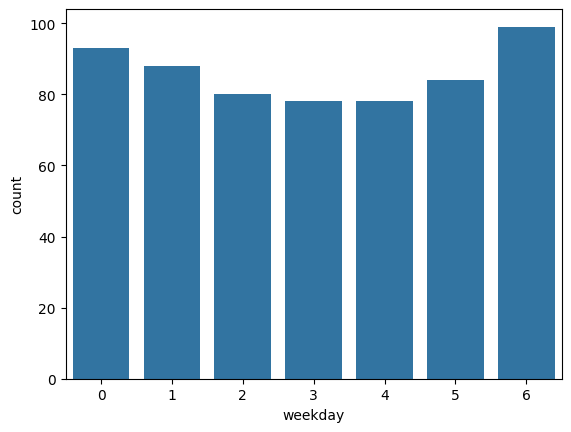

In [488]:
sns.countplot(x='weekday', data=train_df)
plt.show()

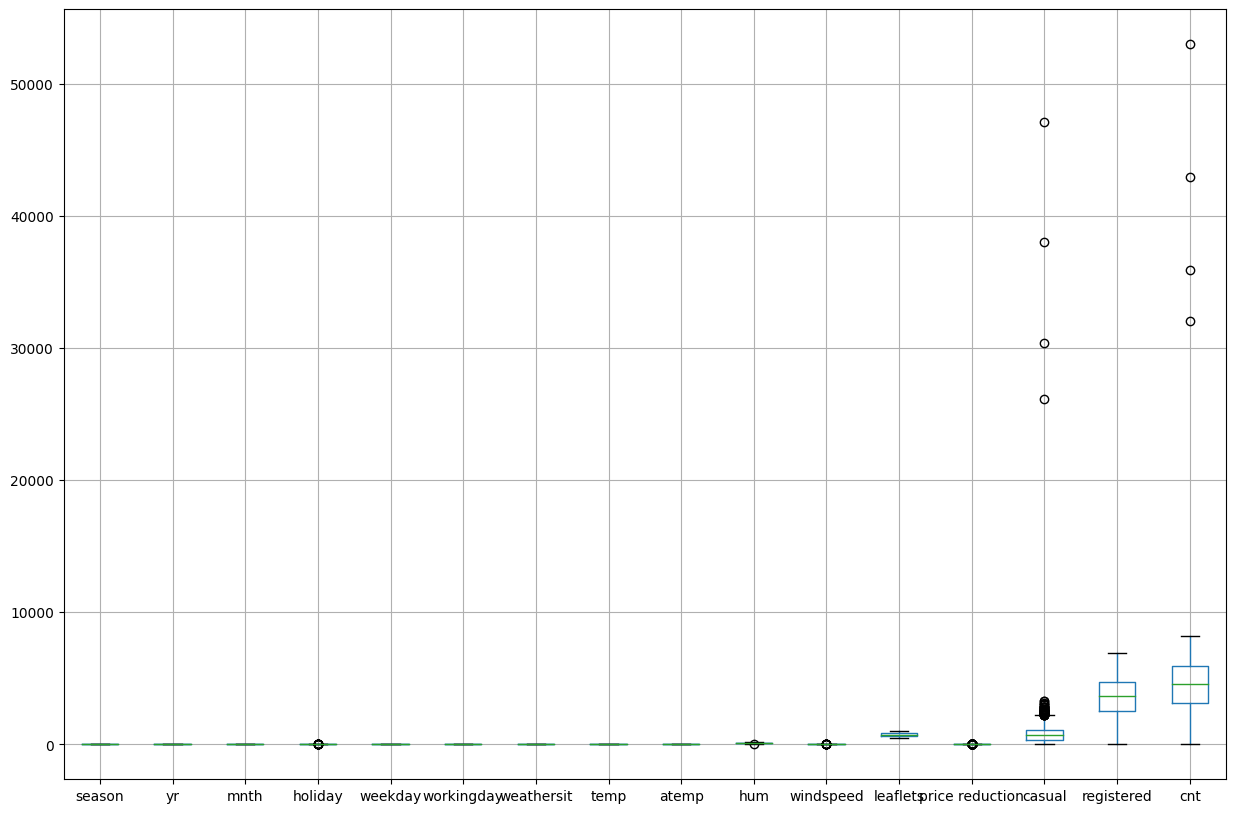

In [489]:
boxplot = train_df.boxplot(figsize=(15, 10))
plt.show()

In [490]:
#filter the df based on the quantile (still have to figure out, which quantile percentage is the right one)
q = train_df["casual"].quantile(0.95)

#q = train_df.iloc[:, 2:].quantile(0.9)
print(q)
handeled_df = train_df[train_df['casual'] < q]

2455.999999999998


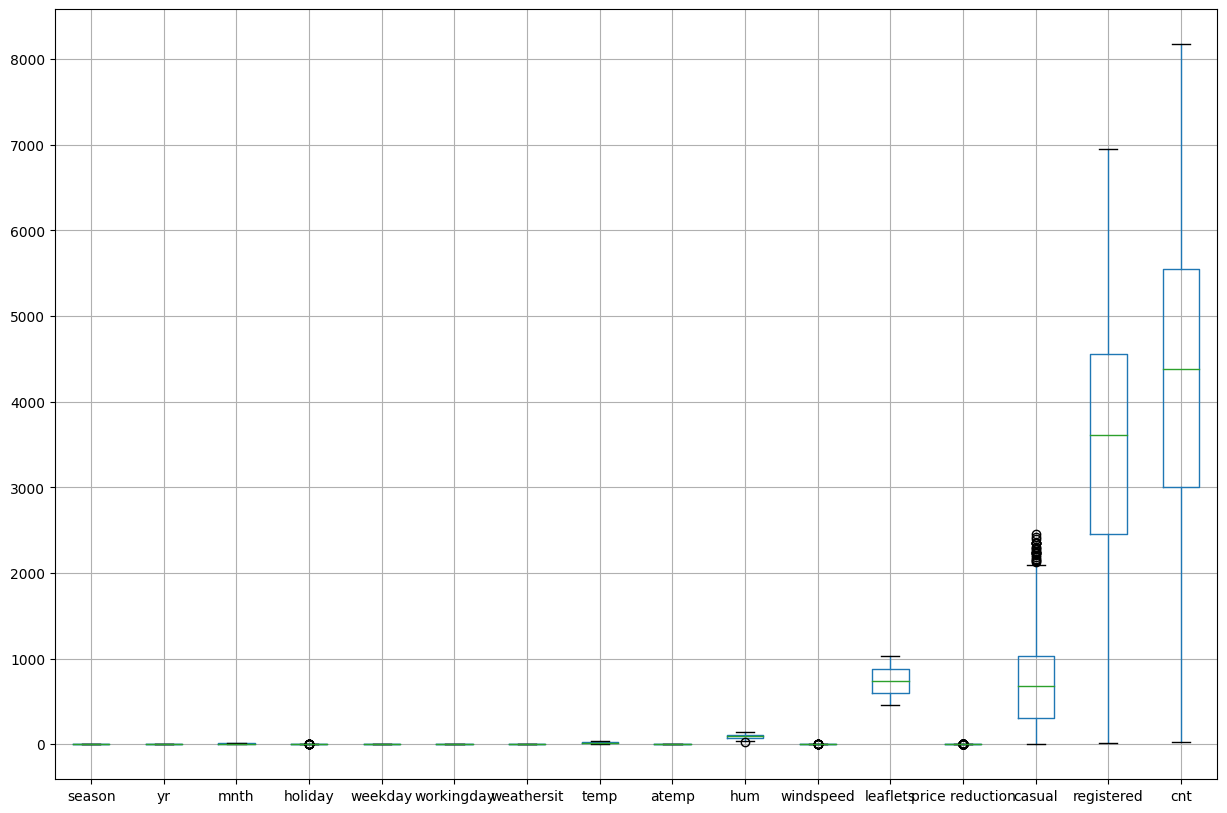

In [491]:
boxplot = handeled_df.boxplot(figsize=(15, 10))
plt.show()

In [492]:
q = handeled_df["casual"].quantile(0.959)

#q = train_df.iloc[:, 2:].quantile(0.9)
print(q)
handeled_df_2 = handeled_df[handeled_df['casual'] < q]

2065.3249999999953


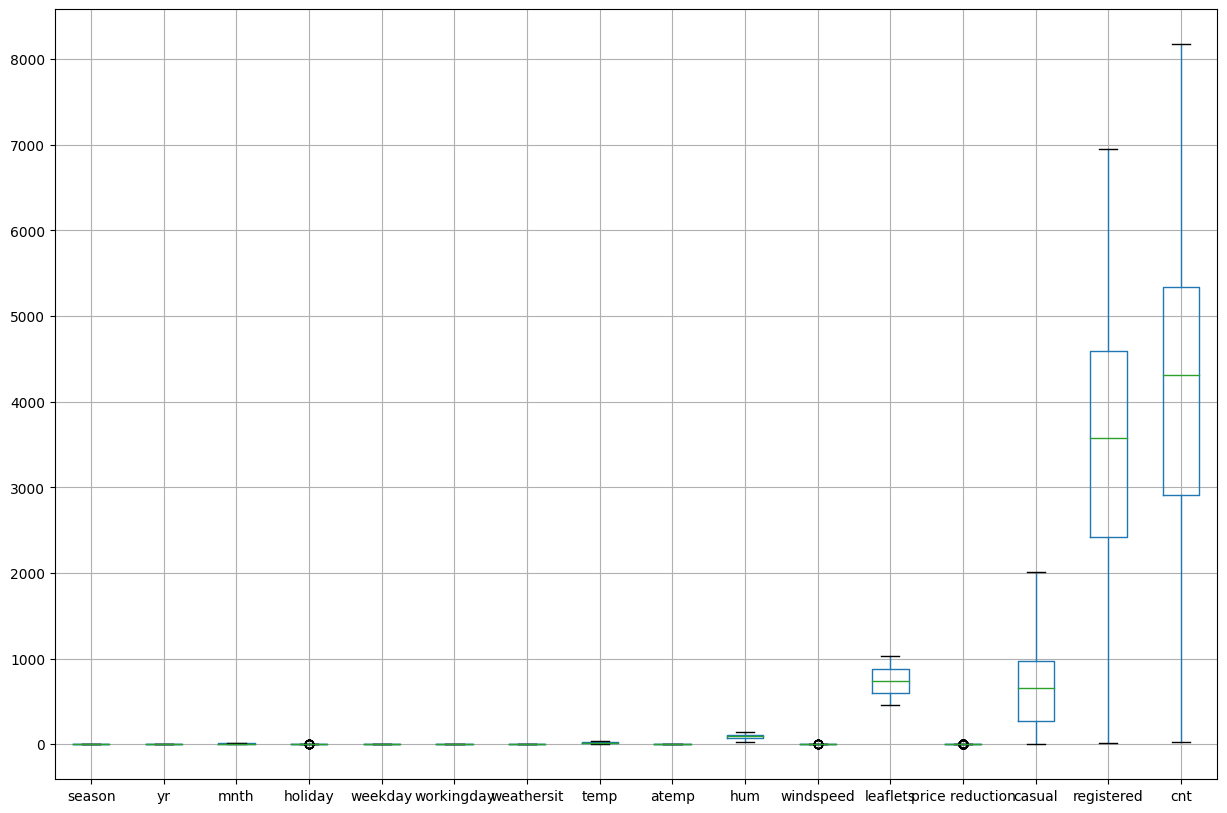

In [493]:
boxplot = handeled_df_2.boxplot(figsize=(15, 10))
plt.show()

In [494]:
feature_handeled_df = handeled_df.iloc[:, :13]
feature_handeled_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets
instant,,,,,,,,,,,,,
1,01.01.2011,1.0,0,1,0,5,0,2,13.7667,0.363625,120.87495,0.160446,755
2,02.01.2011,1.0,0,1,0,6,0,2,14.5391,0.353739,104.41305,0.248539,837
3,03.01.2011,1.0,0,1,0,0,1,1,7.8546,0.189405,65.59095,0.248309,829
4,04.01.2011,1.0,0,1,0,1,1,1,8.0000,0.212122,88.56525,0.160296,734
5,05.01.2011,1.0,0,1,0,2,1,1,9.0783,0.229270,65.54355,0.186900,745


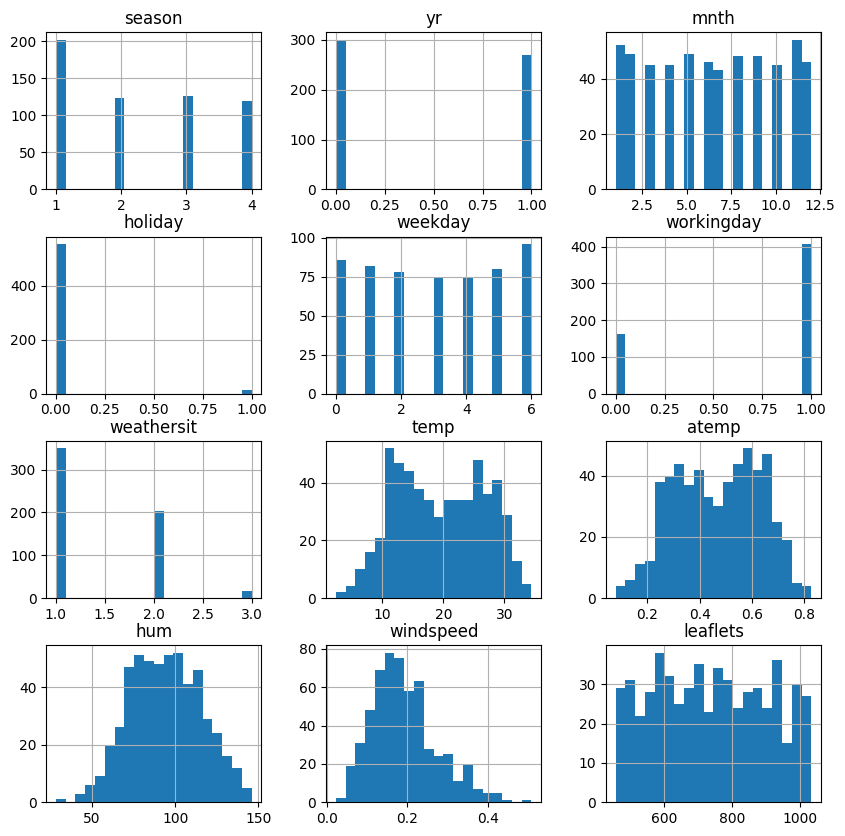

In [495]:
# histogram plot
hist = feature_handeled_df.hist(bins=20,figsize=(10, 10))
# windspeed seems to be skewed, so we will normalize this feature

C:\Users\Akira\AppData\Local\Temp\ipykernel_20060\458554020.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  handeled_df_2['windspeed'] = feature_handeled_df['windspeed ptransformed']


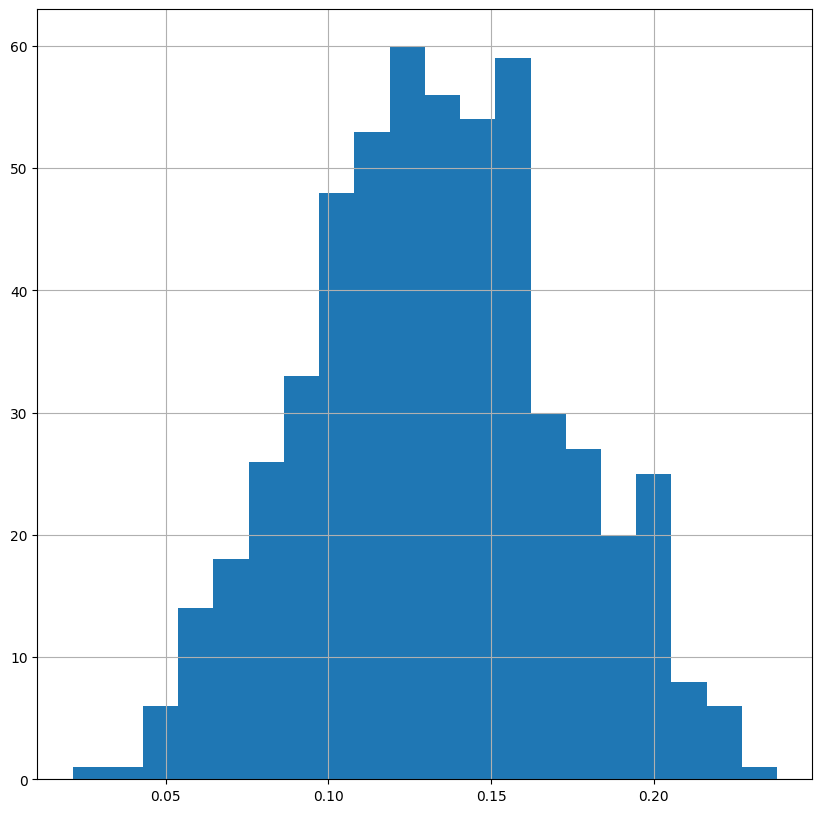

In [496]:
pt = PowerTransformer(standardize=False)
trans_temp= pt.fit_transform(np.array(feature_handeled_df['windspeed'].array.reshape(-1, 1)))


feature_handeled_df['windspeed ptransformed']=trans_temp
handeled_df_2['windspeed'] = feature_handeled_df['windspeed ptransformed']
hist = handeled_df_2['windspeed'].hist(bins=20,figsize=(10, 10))

In [497]:
handeled_df_2

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
instant,,,,,,,,,,,,,,,,,
1,01.01.2011,1.0,0,1,0,5,0,2,13.7667,0.363625,120.87495,0.120422,755,0,331,654,985
2,02.01.2011,1.0,0,1,0,6,0,2,14.5391,0.353739,104.41305,0.162833,837,1,131,670,801
3,03.01.2011,1.0,0,1,0,0,1,1,7.8546,0.189405,65.59095,0.162737,829,0,120,1229,1349
4,04.01.2011,1.0,0,1,0,1,1,1,8.0000,0.212122,88.56525,0.120339,734,0,108,1454,1562
5,05.01.2011,1.0,0,1,0,2,1,1,9.0783,0.229270,65.54355,0.134476,745,0,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,26.12.2012,1.0,1,12,0,3,1,3,9.7333,0.220333,123.49995,0.188325,701,0,9,432,441
727,27.12.2012,1.0,1,12,0,4,1,2,10.1667,0.226642,97.93755,0.199105,561,0,247,1867,2114
728,28.12.2012,1.0,1,12,0,5,1,2,10.1333,0.255046,88.50000,0.117636,562,0,644,2451,3095


### 2.2. Test Data Preprocessing

In [498]:
sorted_df = test_df.sort_values(by=['instant'])
test_df = sorted_df.set_index('instant')

test_df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,leaflets,price reduction,casual,registered,cnt
instant,,,,,,,,,,,,,,,,,
7,07.01.2011,1.0,0,1,0,5,1,2,7.8609,0.208839,74.80440,0.168726,977,0,148,1362,1510
11,11.01.2011,1.0,0,1,0,2,1,2,6.7636,0.191464,102.95460,0.122132,1028,0,43,1220,1263
14,14.01.2011,1.0,0,1,0,5,1,1,6.4348,0.188413,80.67390,0.126548,481,0,54,1367,1421
16,16.01.2011,1.0,0,1,0,0,0,1,9.2667,0.234217,72.56250,0.188433,493,0,251,953,1204
18,18.01.2011,1.0,0,1,0,2,1,2,8.6667,0.232333,129.25005,0.146775,989,0,9,674,683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,09.12.2012,4.0,1,12,0,0,0,2,15.3667,0.390146,135.81255,0.157975,869,0,441,2787,3228
711,11.12.2012,4.0,1,12,0,2,1,2,14.1333,0.338363,89.50005,0.296037,711,0,282,5219,5501
714,14.12.2012,4.0,1,12,0,5,1,1,11.2667,0.294192,96.43755,0.131229,528,0,429,5182,5611


In [499]:
#Again, alot of hum values are over 100, so we have some outliers here
print(len(test_df[test_df["hum"] > 100]))
#Because of the amount of outliers, we delete hum again 
test_df = test_df.drop('hum', axis=1)

45


In [500]:
for i in test_df['season']:
    if np.isnan(i):
        for j in test_df['dteday']:
            if j > '20.12.' and  j < '21.03.':
                test_df['season'] = test_df['season'].replace(i, 1)
            if j > '20.03.' and  j <'21.06.':
                test_df['season'] = test_df['season'].replace(i, 2)
            if j > '20.06.' and  j <'21.09.':
                test_df['season'] = test_df['season'].replace(i, 3)
            if j > '20.09.' and  j <'21.12.':
                test_df['season'] = test_df['season'].replace(i, 4)

test_df['weekday'] = pd.to_datetime(test_df['dteday'], format="%d.%M.%Y").dt.dayofweek

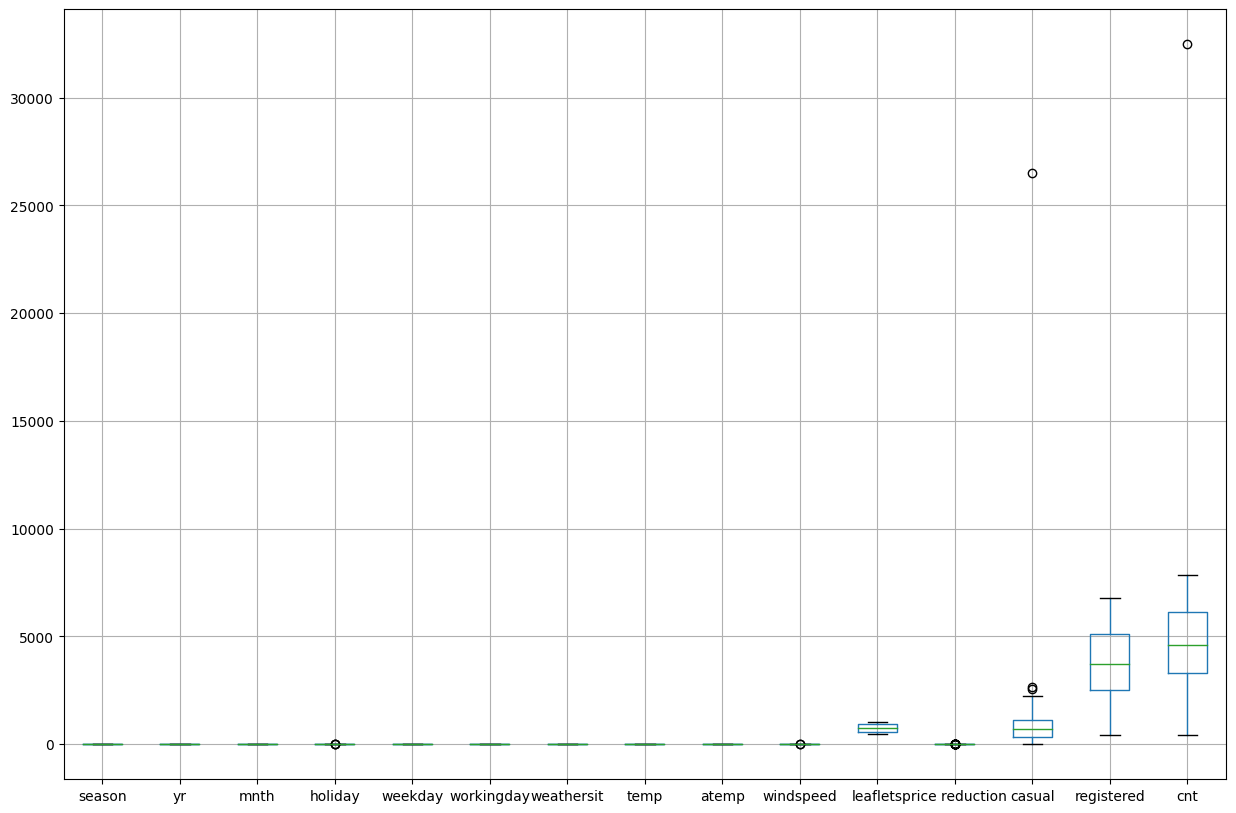

In [501]:
boxplot = test_df.boxplot(figsize=(15, 10))
plt.show()

In [502]:
feature_test_df = test_df.iloc[:, :13]
feature_test_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,windspeed,leaflets,price reduction
instant,,,,,,,,,,,,,
7,07.01.2011,1.0,0,1,0,4,1,2,7.8609,0.208839,0.168726,977,0
11,11.01.2011,1.0,0,1,0,1,1,2,6.7636,0.191464,0.122132,1028,0
14,14.01.2011,1.0,0,1,0,4,1,1,6.4348,0.188413,0.126548,481,0
16,16.01.2011,1.0,0,1,0,6,0,1,9.2667,0.234217,0.188433,493,0
18,18.01.2011,1.0,0,1,0,1,1,2,8.6667,0.232333,0.146775,989,0


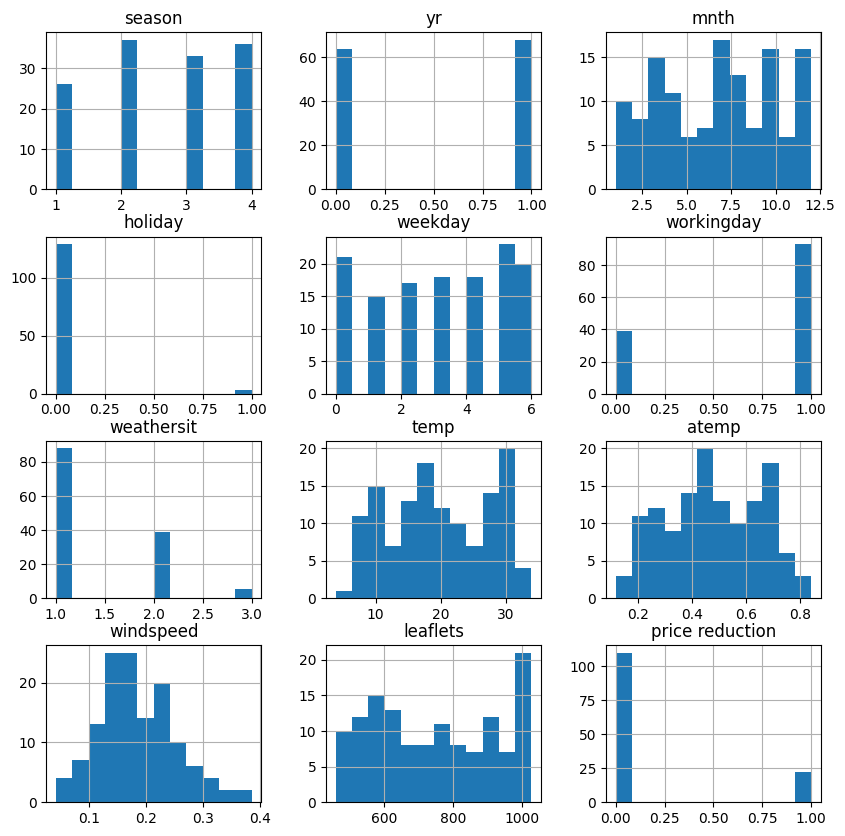

In [503]:
hist = feature_test_df.hist(bins=12,figsize=(10, 10))

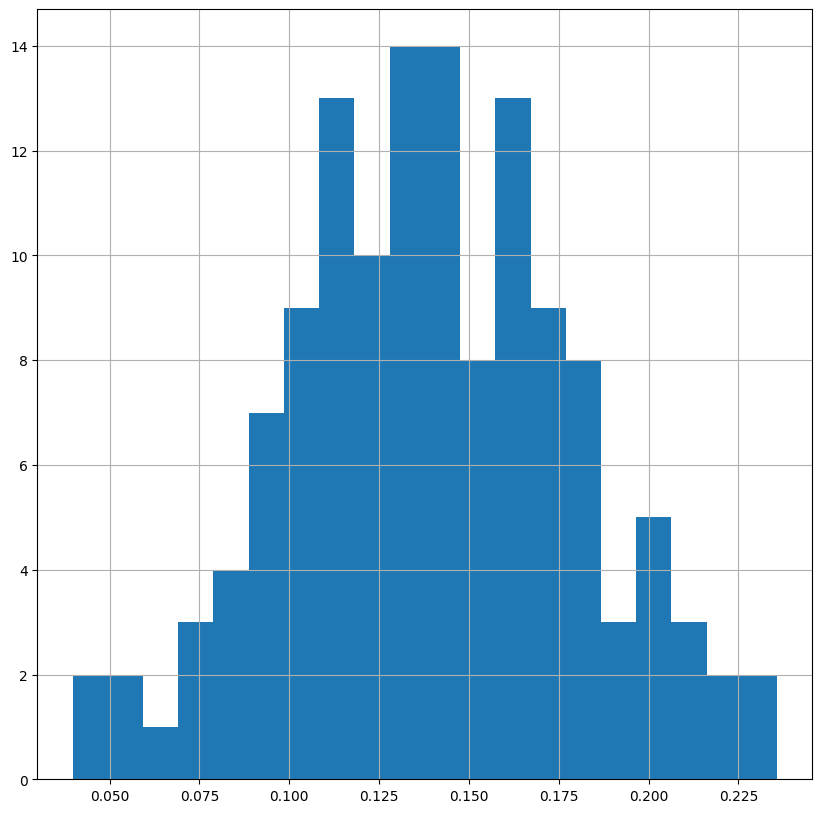

In [504]:
trans_windspeed= pt.fit_transform(np.array(feature_test_df['windspeed'].array.reshape(-1, 1)))

feature_test_df['windspeed ptransformed']=trans_windspeed
test_df['windspeed'] = feature_test_df['windspeed ptransformed']
hist = test_df['windspeed'].hist(bins=20,figsize=(10, 10))

In [505]:
test_df

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,windspeed,leaflets,price reduction,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
7,07.01.2011,1.0,0,1,0,4,1,2,7.8609,0.208839,0.132868,977,0,148,1362,1510
11,11.01.2011,1.0,0,1,0,1,1,2,6.7636,0.191464,0.102294,1028,0,43,1220,1263
14,14.01.2011,1.0,0,1,0,4,1,1,6.4348,0.188413,0.105361,481,0,54,1367,1421
16,16.01.2011,1.0,0,1,0,6,0,1,9.2667,0.234217,0.144692,493,0,251,953,1204
18,18.01.2011,1.0,0,1,0,1,1,2,8.6667,0.232333,0.118945,989,0,9,674,683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,09.12.2012,4.0,1,12,0,0,0,2,15.3667,0.390146,0.126151,869,0,441,2787,3228
711,11.12.2012,4.0,1,12,0,2,1,2,14.1333,0.338363,0.199726,711,0,282,5219,5501
714,14.12.2012,4.0,1,12,0,5,1,1,11.2667,0.294192,0.108572,528,0,429,5182,5611


## 3. New Linear Regression Model